In [131]:
!pip install pymystem3
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python
!pip install natasha

In [83]:
import nltk
from nltk.tokenize import word_tokenize
import pymorphy2 as pm
from pymystem3 import Mystem
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from string import punctuation
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
from collections import Counter

# Подготовка текста

## Загружаем русский текст

In [84]:
with open ('Смерть после полудня.txt') as text:
    text_plain_ru=text.read()
with open ('contemporary translations.txt') as text:
    ct=text.read()

## Загружаем английский текст

In [85]:
with open ('Death_after_noon.txt') as text:
    text_plain_en=text.read()
with open ('Short stories.txt') as text:
    text_full_en=text.read()


# Загружаем дополнит текст

In [86]:
with open ('Доронина_Очень короткая история.txt') as text:
    add=text.read()

## Сделаем две таблички с текстами

In [87]:
text_plain_ru=text_plain_ru.split('<p>')
text_plain_ct=ct.split('<>')
# print(len(text_plain_ru))
# print(len(text_plain_ct))

text_ru=' '.join(text_plain_ru)
ct_text_ru=' '.join(text_plain_ct)
full_text_ct=['contemporaries', 'ct',ct_text_ru]
full_text_ru=['ППК', 'Смерть после полудня',text_ru]
text_new_ru=np.array(text_plain_ru+full_text_ru+text_plain_ct+full_text_ct+['Доронина','Очень короткая история', add])
table_ru = pd.DataFrame(text_new_ru.reshape((30, 3)))
table_ru.rename(columns={0:'translator', 1:"name",2:'text'}, inplace=True)

In [88]:
def del_n(phrase):
    return word_tokenize(phrase)

cleans = table_ru['translator'].apply(del_n)
table_ru.drop('translator', axis=1, inplace=True)
table_ru['translator'] = cleans

In [89]:
def del_n(phrase):
    return word_tokenize(phrase)

cleans = table_ru['name'].apply(del_n)
table_ru.drop('name', axis=1, inplace=True)
table_ru['name'] = cleans

In [90]:
table_ru

,text,translator,name
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]"
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]"
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]"
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]"
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион]
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]"
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома]
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]"
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]"
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]"


In [91]:
text_plain_en1=text_plain_en.split('<>')
text_en=' '.join(text_plain_en)
text_new_en=np.array(text_plain_en1+['Short_sories']+[text_plain_en])
table_en = pd.DataFrame(text_new_en.reshape((21, 2)))
table_en.rename(columns={0:"name",1:'text'}, inplace=True)

In [92]:
table_en

,name,text
0,Indian Camp,\nAt the lake shore there was another rowboat ...
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...


In [93]:
add=pd.DataFrame()

## Разделим на предложения и посчитаем их количество

In [94]:
pattern = re.compile(r'([А-ЯA-Z]((т.п.|т.д.|пр.|г.)|[^?!.\(]|\([^\)]*\))*[.?!])')
def num_of_sent(text):
    for i,sent in enumerate(pattern.findall(text)):
        a='[{}]{}'.format(i+1,sent[0])
    return (i+1)
num_of_sent = table_ru['text'].apply(num_of_sent)
table_ru['num_of_sent'] = num_of_sent
table_ru

,text,translator,name,num_of_sent
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262


In [95]:
pattern = re.compile(r'([А-ЯA-Z]((т.п.|т.д.|пр.|г.)|[^?!.\(]|\([^\)]*\))*[.?!])')
def num_of_sent(text):
    for i,sent in enumerate(pattern.findall(text)):
        a='[{}]{}'.format(i+1,sent[0])
    return (i+1)
num_of_sent = table_en['text'].apply(num_of_sent)
table_en['num_of_sent'] = num_of_sent
table_en

,name,text,num_of_sent
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258


## Токенизируем (делим на слова) и переводим все буквы в нижний регистр


In [96]:
def tokens(novel):
    return word_tokenize(novel)

text_tokenized = table_ru['text'].apply(tokens)
table_ru['text_tokenized'] = text_tokenized
table_ru

,text,translator,name,num_of_sent,text_tokenized
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,..."
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс..."
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк..."
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш..."
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл..."
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ..."
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко..."
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ..."
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,..."
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо..."


In [97]:
def tokens(novel):
    return word_tokenize(novel)

text_tokenized = table_en['text'].apply(tokens)
table_en['text_tokenized'] = text_tokenized
table_en

,name,text,num_of_sent,text_tokenized
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro..."
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,..."
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum..."
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t..."
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H..."
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ..."
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist..."
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to..."
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ..."
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by..."


## Уберем стоп-слова и пунктуацию

In [98]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /Users/dasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
stopwords

<WordListCorpusReader in '/Users/dasha/nltk_data/corpora/stopwords'>

In [100]:
my_stopwords=stopwords.words('english')+['would']+['back']+stopwords.words('russian')+['это','ты'+'очень'+'чей']

In [101]:
noise = list(punctuation)+['—']
length_before=[]
length_after=[]
percentage_of_stop_words=[]
def del_stopwords_ru (text):

    text_clean = [(word).lower() for word in text if not word in noise]
    (length_before).append(len(text_clean))
    text = [(word).lower() for word in text_clean if not word in my_stopwords]
    (length_after).append(len(text))
    percentage_of_stop_words.append((len(text_clean)-len(text))/len(text_clean)*100)
    return(text)

In [102]:
text_clean = table_ru['text_tokenized'].apply(del_stopwords_ru)
table_ru['text_clean'] = text_clean
table_ru['length_before'] = length_before
table_ru['length_after'] = length_after
table_ru['percentage_of_stop_words']=percentage_of_stop_words
num_of_words_in_sent = table_ru['length_after']/table_ru['num_of_sent']
table_ru['num_of_words_in_sent']=num_of_words_in_sent

table_ru

,text,translator,name,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,...","[озере, берега, причалена, чужая, лодка, возле...",1134,720,36.507937,4.897959
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс...","[отец, ника, нанял, дика, боултона, индейского...",1088,677,37.775735,5.014815
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк...","[прежние, времена, хортонс-бей, городком, лесо...",1083,705,34.903047,4.964789
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш...","[ник, свернул, дорогу, проходившую, фруктовый,...",2696,1576,41.543027,3.725768
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл...","[ник, встал, невредим, взглянул, рельсы, огни,...",2626,1693,35.529322,4.275253
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ...","[душным, вечером, падуе, вынесли, крышу, откуд...",536,274,48.880597,6.850000
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко...","[кребс, ушел, фронт, методистского, колледжа, ...",2307,1296,43.823147,4.853933
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ...","[мистер, миссис, эллиот, очень, старались, име...",1262,723,42.709984,8.817073
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,...","[отеле, двое, американцев, знали, никого, тех,...",958,604,36.951983,5.252174
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо...","[четыре, лиры, которые, педуцци, заработал, ко...",2073,1335,35.600579,5.095420


In [103]:
noise = list(punctuation)+['—']
length_before=[]
length_after=[]
percentage_of_stop_words=[]
def del_stopwords_en (text):

    text_clean = [(word).lower() for word in text if not word in noise]
    (length_before).append(len(text_clean))
    text = [(word).lower() for word in text_clean if not word in my_stopwords]
    (length_after).append(len(text))
    percentage_of_stop_words.append((len(text_clean)-len(text))/len(text_clean)*100)
    return(text)

In [104]:

text_clean = table_en['text_tokenized'].apply(del_stopwords_en)
table_en['text_clean'] = text_clean
table_en['length_before'] = length_before
table_en['length_after'] = length_after
table_en['percentage_of_stop_words']=percentage_of_stop_words
num_of_words_in_sent = table_en['length_after']/table_en['num_of_sent']
table_en['num_of_words_in_sent']=num_of_words_in_sent

table_en

,name,text,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro...","[lake, shore, another, rowboat, drawn, two, in...",1614,833,48.389095,5.444444
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,...","[dick, boulton, came, indian, camp, cut, logs,...",1580,809,48.797468,5.905109
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum...","[old, days, hortons, bay, lumbering, town, one...",1599,841,47.404628,6.007143
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t...","[rain, stopped, nick, turned, road, went, orch...",3913,2177,44.364937,5.258454
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H...","[nick, stood, right, looked, track, lights, ca...",3420,1825,46.637427,4.866667
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ...","[one, hot, evening, padua, carried, onto, roof...",635,260,59.055118,6.500000
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist...","[krebs, went, war, methodist, college, kansas,...",3038,1410,53.587887,5.222222
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to...","[mr., mrs., elliot, tried, hard, baby, tried, ...",1400,638,54.428571,6.715789
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ...","[two, americans, stopping, hotel, know, people...",1245,629,49.477912,5.330508
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by...","[four, lire, peduzzi, earned, spading, hotel, ...",2436,1315,46.018062,5.096899


# Посчитаем нужные характеристики

## Посчитаем длину слова

In [105]:
from scipy import stats

In [106]:
def len_of_words_mode(text):  
    num_let=[]
    for word in text: 
        num_let+=[len(word)]
    return stats.mode(np.array(num_let))[0]
len_of_word = (table_ru['text_clean']).apply(len_of_words_mode)
table_ru["len_of_word_mode"]=len_of_word

In [107]:
def len_of_words_av(text):  
    num_let=0
    for word in text:
        num_let+=(len(word))
    len_of_word=num_let/len(text)
    return len_of_word
len_of_word = table_ru['text_clean'].apply(len_of_words_av)
table_ru["len_of_word_av"]=len_of_word

In [108]:
table_ru

,text,translator,name,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,...","[озере, берега, причалена, чужая, лодка, возле...",1134,720,36.507937,4.897959,[6],6.047222
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс...","[отец, ника, нанял, дика, боултона, индейского...",1088,677,37.775735,5.014815,[6],6.212703
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк...","[прежние, времена, хортонс-бей, городком, лесо...",1083,705,34.903047,4.964789,[5],6.251064
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш...","[ник, свернул, дорогу, проходившую, фруктовый,...",2696,1576,41.543027,3.725768,[6],5.960025
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл...","[ник, встал, невредим, взглянул, рельсы, огни,...",2626,1693,35.529322,4.275253,[6],5.593030
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ...","[душным, вечером, падуе, вынесли, крышу, откуд...",536,274,48.880597,6.850000,[5],6.697080
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко...","[кребс, ушел, фронт, методистского, колледжа, ...",2307,1296,43.823147,4.853933,[5],6.216821
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ...","[мистер, миссис, эллиот, очень, старались, име...",1262,723,42.709984,8.817073,[6],6.710927
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,...","[отеле, двое, американцев, знали, никого, тех,...",958,604,36.951983,5.252174,[7],6.120861
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо...","[четыре, лиры, которые, педуцци, заработал, ко...",2073,1335,35.600579,5.095420,[7],5.967790


In [109]:
def len_of_words_mode(text):  
    num_let=[]
    for word in text: 
        num_let+=[len(word)]
    return stats.mode(np.array(num_let))[0]
len_of_word = (table_en['text_clean']).apply(len_of_words_mode)
table_en["len_of_word_mode"]=len_of_word

In [110]:

def len_of_words_av(text):  
    num_let=0
    for word in text:
        num_let+=(len(word))
    len_of_word=num_let/len(text)
    return len_of_word
len_of_word = table_en['text_clean'].apply(len_of_words_av)
table_en["len_of_word_av"]=len_of_word

In [111]:
table_en

,name,text,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro...","[lake, shore, another, rowboat, drawn, two, in...",1614,833,48.389095,5.444444,[4],4.518607
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,...","[dick, boulton, came, indian, camp, cut, logs,...",1580,809,48.797468,5.905109,[4],4.384425
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum...","[old, days, hortons, bay, lumbering, town, one...",1599,841,47.404628,6.007143,[4],4.499405
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t...","[rain, stopped, nick, turned, road, went, orch...",3913,2177,44.364937,5.258454,[4],3.842444
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H...","[nick, stood, right, looked, track, lights, ca...",3420,1825,46.637427,4.866667,[4],4.174795
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ...","[one, hot, evening, padua, carried, onto, roof...",635,260,59.055118,6.500000,[4],5.376923
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist...","[krebs, went, war, methodist, college, kansas,...",3038,1410,53.587887,5.222222,[4],4.704965
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to...","[mr., mrs., elliot, tried, hard, baby, tried, ...",1400,638,54.428571,6.715789,[4],5.523511
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ...","[two, americans, stopping, hotel, know, people...",1245,629,49.477912,5.330508,[4],4.510334
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by...","[four, lire, peduzzi, earned, spading, hotel, ...",2436,1315,46.018062,5.096899,[4],4.773384


## Лемматизируем

In [112]:
mystem_analyzer = Mystem()
def lemmatizer_ru(text):
    text_lemmatized=mystem_analyzer.lemmatize(' '.join(text))
    return ' '.join([word for word in text_lemmatized if word.isalpha()])
lemmas=table_ru['text_clean'].apply(lemmatizer_ru)
table_ru['lemmas']=lemmas
table_ru

,text,translator,name,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,...","[озере, берега, причалена, чужая, лодка, возле...",1134,720,36.507937,4.897959,[6],6.047222,озеро берег причаливать чужой лодка возле стоя...
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс...","[отец, ника, нанял, дика, боултона, индейского...",1088,677,37.775735,5.014815,[6],6.212703,отец ника нанимать дикий боултон индейский пос...
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк...","[прежние, времена, хортонс-бей, городком, лесо...",1083,705,34.903047,4.964789,[5],6.251064,прежний время хортонс бить городок лесопильный...
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш...","[ник, свернул, дорогу, проходившую, фруктовый,...",2696,1576,41.543027,3.725768,[6],5.960025,ник свертывать дорога проходить фруктовый сад ...
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл...","[ник, встал, невредим, взглянул, рельсы, огни,...",2626,1693,35.529322,4.275253,[6],5.593030,ник вставать невредимый взглядывать рельс огон...
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ...","[душным, вечером, падуе, вынесли, крышу, откуд...",536,274,48.880597,6.850000,[5],6.697080,душный вечер падуя вынести крыша откуда мочь с...
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко...","[кребс, ушел, фронт, методистского, колледжа, ...",2307,1296,43.823147,4.853933,[5],6.216821,кребс уходить фронт методистский колледж канза...
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ...","[мистер, миссис, эллиот, очень, старались, име...",1262,723,42.709984,8.817073,[6],6.710927,мистер миссис эллиот очень стараться иметь реб...
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,...","[отеле, двое, американцев, знали, никого, тех,...",958,604,36.951983,5.252174,[7],6.120861,отель двое американец знать никто тот кто встр...
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо...","[четыре, лиры, которые, педуцци, заработал, ко...",2073,1335,35.600579,5.095420,[7],5.967790,четыре лира который педуцци зарабатывать копат...


In [113]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def lemmatizer_en(text):
    text_lemmatized=[]
    for i in text:
        text_lemmatized.append(lemmatizer.lemmatize(i))
    return' '.join([word for word in text_lemmatized if word.isalpha()])
lemmas=table_en['text_clean'].apply(lemmatizer_en)
table_en['lemmas']=lemmas
table_en

,name,text,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro...","[lake, shore, another, rowboat, drawn, two, in...",1614,833,48.389095,5.444444,[4],4.518607,lake shore another rowboat drawn two indian st...
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,...","[dick, boulton, came, indian, camp, cut, logs,...",1580,809,48.797468,5.905109,[4],4.384425,dick boulton came indian camp cut log nick fat...
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum...","[old, days, hortons, bay, lumbering, town, one...",1599,841,47.404628,6.007143,[4],4.499405,old day hortons bay lumbering town one lived s...
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t...","[rain, stopped, nick, turned, road, went, orch...",3913,2177,44.364937,5.258454,[4],3.842444,rain stopped nick turned road went orchard fru...
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H...","[nick, stood, right, looked, track, lights, ca...",3420,1825,46.637427,4.866667,[4],4.174795,nick stood right looked track light caboose go...
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ...","[one, hot, evening, padua, carried, onto, roof...",635,260,59.055118,6.500000,[4],5.376923,one hot evening padua carried onto roof could ...
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist...","[krebs, went, war, methodist, college, kansas,...",3038,1410,53.587887,5.222222,[4],4.704965,krebs went war methodist college kansa picture...
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to...","[mr., mrs., elliot, tried, hard, baby, tried, ...",1400,638,54.428571,6.715789,[4],5.523511,elliot tried hard baby tried often elliot coul...
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ...","[two, americans, stopping, hotel, know, people...",1245,629,49.477912,5.330508,[4],4.510334,two american stopping hotel know people passed...
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by...","[four, lire, peduzzi, earned, spading, hotel, ...",2436,1315,46.018062,5.096899,[4],4.773384,four lira peduzzi earned spading hotel garden ...


# Посчитаем широту словарного запаса

In [114]:
def voc_density(text):
    text=text.split(' ')
    return(len(set(text))/len(text))
table_ru['voc_d'] = table_ru['lemmas'].apply(voc_density)
table_en['voc_d'] = table_en['lemmas'].apply(voc_density)
#

In [115]:

table_en

,name,text,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas,voc_d
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro...","[lake, shore, another, rowboat, drawn, two, in...",1614,833,48.389095,5.444444,[4],4.518607,lake shore another rowboat drawn two indian st...,0.480118
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,...","[dick, boulton, came, indian, camp, cut, logs,...",1580,809,48.797468,5.905109,[4],4.384425,dick boulton came indian camp cut log nick fat...,0.524691
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum...","[old, days, hortons, bay, lumbering, town, one...",1599,841,47.404628,6.007143,[4],4.499405,old day hortons bay lumbering town one lived s...,0.463450
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t...","[rain, stopped, nick, turned, road, went, orch...",3913,2177,44.364937,5.258454,[4],3.842444,rain stopped nick turned road went orchard fru...,0.360215
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H...","[nick, stood, right, looked, track, lights, ca...",3420,1825,46.637427,4.866667,[4],4.174795,nick stood right looked track light caboose go...,0.394408
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ...","[one, hot, evening, padua, carried, onto, roof...",635,260,59.055118,6.500000,[4],5.376923,one hot evening padua carried onto roof could ...,0.708171
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist...","[krebs, went, war, methodist, college, kansas,...",3038,1410,53.587887,5.222222,[4],4.704965,krebs went war methodist college kansa picture...,0.436860
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to...","[mr., mrs., elliot, tried, hard, baby, tried, ...",1400,638,54.428571,6.715789,[4],5.523511,elliot tried hard baby tried often elliot coul...,0.561889
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ...","[two, americans, stopping, hotel, know, people...",1245,629,49.477912,5.330508,[4],4.510334,two american stopping hotel know people passed...,0.484674
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by...","[four, lire, peduzzi, earned, spading, hotel, ...",2436,1315,46.018062,5.096899,[4],4.773384,four lira peduzzi earned spading hotel garden ...,0.450623


In [116]:
table_ru

,text,translator,name,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas,voc_d
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,...","[озере, берега, причалена, чужая, лодка, возле...",1134,720,36.507937,4.897959,[6],6.047222,озеро берег причаливать чужой лодка возле стоя...,0.532123
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс...","[отец, ника, нанял, дика, боултона, индейского...",1088,677,37.775735,5.014815,[6],6.212703,отец ника нанимать дикий боултон индейский пос...,0.549168
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк...","[прежние, времена, хортонс-бей, городком, лесо...",1083,705,34.903047,4.964789,[5],6.251064,прежний время хортонс бить городок лесопильный...,0.531250
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш...","[ник, свернул, дорогу, проходившую, фруктовый,...",2696,1576,41.543027,3.725768,[6],5.960025,ник свертывать дорога проходить фруктовый сад ...,0.432730
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл...","[ник, встал, невредим, взглянул, рельсы, огни,...",2626,1693,35.529322,4.275253,[6],5.593030,ник вставать невредимый взглядывать рельс огон...,0.456237
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ...","[душным, вечером, падуе, вынесли, крышу, откуд...",536,274,48.880597,6.850000,[5],6.697080,душный вечер падуя вынести крыша откуда мочь с...,0.809701
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко...","[кребс, ушел, фронт, методистского, колледжа, ...",2307,1296,43.823147,4.853933,[5],6.216821,кребс уходить фронт методистский колледж канза...,0.508058
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ...","[мистер, миссис, эллиот, очень, старались, име...",1262,723,42.709984,8.817073,[6],6.710927,мистер миссис эллиот очень стараться иметь реб...,0.610000
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,...","[отеле, двое, американцев, знали, никого, тех,...",958,604,36.951983,5.252174,[7],6.120861,отель двое американец знать никто тот кто встр...,0.519626
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо...","[четыре, лиры, которые, педуцци, заработал, ко...",2073,1335,35.600579,5.095420,[7],5.967790,четыре лира который педуцци зарабатывать копат...,0.495741


## TF-IDF

In [117]:
cnt_vec = CountVectorizer()
tfidf_vec = TfidfVectorizer()

In [118]:
texts_ru=table_ru['lemmas']
X = cnt_vec.fit_transform(texts_ru)
X = tfidf_vec.fit_transform(texts_ru)
TF_IDF_ru=pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names())
TF_IDF_ru

,anis,ans,arturo,au,avanti,bebe,brutto,buon,caro,cervezas,...,яркий,ярко,ярлык,ярость,ясно,ясность,ясный,ясь,яхта,ящик
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.007012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007446
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043921,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.033395,0.000000,0.033395,0.000000,0.000000,0.000000,...,0.028280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.016723,0.000000,0.000000,0.000000,0.000000,0.016723,0.033446,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013248


In [119]:
dist_words=[]
for i in range (30):
    dist_words.append(list(((TF_IDF_ru[i:i+1]).T.sort_values(by=[i], ascending=False).head(10)).index))
table_ru['dist_words']=dist_words
table_ru

,text,translator,name,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas,voc_d,dist_words
0,\n На озере у берега была причалена чужая лод...,[Холмская],"[Индейский, поселок]",147,"[На, озере, у, берега, была, причалена, чужая,...","[озере, берега, причалена, чужая, лодка, возле...",1134,720,36.507937,4.897959,[6],6.047222,озеро берег причаливать чужой лодка возле стоя...,0.532123,"[индеец, ник, отец, джордж, дядя, лодка, сказа..."
1,\n Отец Ника нанял Дика Боултона из индейског...,[Волжина],"[Доктор, и, его, жена]",135,"[Отец, Ника, нанял, Дика, Боултона, из, индейс...","[отец, ника, нанял, дика, боултона, индейского...",1088,677,37.775735,5.014815,[6],6.212703,отец ника нанимать дикий боултон индейский пос...,0.549168,"[дикий, бревно, доктор, боултон, сказать, эдди..."
2,\n В прежние времена Хортонс-Бей был городком...,[Волжина],"[Что-то, кончилось]",142,"[В, прежние, времена, Хортонс-Бей, был, городк...","[прежние, времена, хортонс-бей, городком, лесо...",1083,705,34.903047,4.964789,[5],6.251064,прежний время хортонс бить городок лесопильный...,0.531250,"[марджори, ник, лодка, сказать, завод, костер,..."
3,"\n Когда Ник свернул на дорогу, проходившую ч...",[Волжина],"[Трехдневная, непогода]",423,"[Когда, Ник, свернул, на, дорогу, ,, проходивш...","[ник, свернул, дорогу, проходившую, фруктовый,...",2696,1576,41.543027,3.725768,[6],5.960025,ник свертывать дорога проходить фруктовый сад ...,0.432730,"[билл, ник, сказать, висок, камин, стакан, уол..."
4,\n Ник встал. Он был невредим. Он взглянул на...,[Романова],[Чемпион],396,"[Ник, встал, ., Он, был, невредим, ., Он, взгл...","[ник, встал, невредим, взглянул, рельсы, огни,...",2626,1693,35.529322,4.275253,[6],5.593030,ник вставать невредимый взглядывать рельс огон...,0.456237,"[ник, негр, эд, багс, адамс, сказать, мистер, ..."
5,\n\nДушным вечером в Падуе его вынесли на крыш...,[ГЕОРГИЕВСКАЯ],"[Очень, короткий, рассказ]",40,"[Душным, вечером, в, Падуе, его, вынесли, на, ...","[душным, вечером, падуе, вынесли, крышу, откуд...",536,274,48.880597,6.850000,[5],6.697080,душный вечер падуя вынести крыша откуда мочь с...,0.809701,"[люза, пожениться, получать, работа, падуя, ма..."
6,\n Кребс ушел на фронт из методистского колле...,[Дарузес],[Дома],267,"[Кребс, ушел, на, фронт, из, методистского, ко...","[кребс, ушел, фронт, методистского, колледжа, ...",2307,1296,43.823147,4.853933,[5],6.216821,кребс уходить фронт методистский колледж канза...,0.508058,"[кребс, мать, гарольд, сказать, женщина, отец,..."
7,\n Мистер и миссис Эллиот очень старались им...,[Лорие],"[Мистер, и, миссис, Эллиотт]",82,"[Мистер, и, миссис, Эллиот, очень, старались, ...","[мистер, миссис, эллиот, очень, старались, име...",1262,723,42.709984,8.817073,[6],6.710927,мистер миссис эллиот очень стараться иметь реб...,0.610000,"[эллиот, корнелия, миссис, подруга, дижон, пар..."
8,\n В отеле было только двое американцев. Они н...,[Кислова],"[Кошка, под, дождем]",115,"[В, отеле, было, только, двое, американцев, .,...","[отеле, двое, американцев, знали, никого, тех,...",958,604,36.951983,5.252174,[7],6.120861,отель двое американец знать никто тот кто встр...,0.519626,"[кошка, американка, дождь, сказать, джордж, сл..."
9,"\nНа четыре лиры, которые Педуцци заработал, к...",[Георгиевская],"[Не, в, сезон]",262,"[На, четыре, лиры, ,, которые, Педуцци, зарабо...","[четыре, лиры, которые, педуцци, заработал, ко...",2073,1335,35.600579,5.095420,[7],5.967790,четыре лира который педуцци зарабатывать копат...,0.495741,"[педуцци, американец, марсала, сказать, бык, p..."


In [144]:
np.array(table_ru[['dist_words']][9:10]) 


array([[list(['педуцци', 'американец', 'марсала', 'сказать', 'бык', 'piombo', 'лира', 'виляльт', 'американка', 'удочка'])]],
      dtype=object)

In [122]:
texts_en=table_en['lemmas']
X = cnt_vec.fit_transform(texts_en)
X = tfidf_vec.fit_transform(texts_en)
TF_IDF_en=pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names())


In [123]:
dist_words=[]
for i in range (21):
    dist_words.append(list(((TF_IDF_en[i:i+1]).T.sort_values(by=[i], ascending=False).head(10)).index))
table_en['dist_words']=dist_words
table_en

,name,text,num_of_sent,text_tokenized,text_clean,length_before,length_after,percentage_of_stop_words,num_of_words_in_sent,len_of_word_mode,len_of_word_av,lemmas,voc_d,dist_words
0,Indian Camp,\nAt the lake shore there was another rowboat ...,153,"[At, the, lake, shore, there, was, another, ro...","[lake, shore, another, rowboat, drawn, two, in...",1614,833,48.389095,5.444444,[4],4.518607,lake shore another rowboat drawn two indian st...,0.480118,"[indian, nick, uncle, father, george, said, bo..."
1,The Doctor and the Doctor’s Wife,\nDICK BOULTON CAME FROM THE INDIAN camp to cu...,137,"[DICK, BOULTON, CAME, FROM, THE, INDIAN, camp,...","[dick, boulton, came, indian, camp, cut, logs,...",1580,809,48.797468,5.905109,[4],4.384425,dick boulton came indian camp cut log nick fat...,0.524691,"[dick, doctor, log, eddy, said, billy, tabesha..."
2,The End of Something,\nIN THE OLD DAYS HORTONS BAY WAS A lumbering ...,140,"[IN, THE, OLD, DAYS, HORTONS, BAY, WAS, A, lum...","[old, days, hortons, bay, lumbering, town, one...",1599,841,47.404628,6.007143,[4],4.499405,old day hortons bay lumbering town one lived s...,0.463450,"[marjorie, nick, boat, mill, said, line, bay, ..."
3,The Three-Day Blow,\nTHE RAIN STOPPED AS NICK TURNED INTO the roa...,414,"[THE, RAIN, STOPPED, AS, NICK, TURNED, INTO, t...","[rain, stopped, nick, turned, road, went, orch...",3913,2177,44.364937,5.258454,[4],3.842444,rain stopped nick turned road went orchard fru...,0.360215,"[bill, nick, said, fire, whisky, right, get, d..."
4,The Battler,\nNICK STOOD UP. HE WAS ALL RIGHT. HE looked u...,375,"[NICK, STOOD, UP, ., HE, WAS, ALL, RIGHT, ., H...","[nick, stood, right, looked, track, lights, ca...",3420,1825,46.637427,4.866667,[4],4.174795,nick stood right looked track light caboose go...,0.394408,"[nick, negro, mister, ad, bug, said, fire, man..."
5,A Very Short Story,\nONE HOT EVENING IN PADUA THEY CARried him up...,40,"[ONE, HOT, EVENING, IN, PADUA, THEY, CARried, ...","[one, hot, evening, padua, carried, onto, roof...",635,260,59.055118,6.500000,[4],5.376923,one hot evening padua carried onto roof could ...,0.708171,"[luz, married, job, went, rainy, major, battal..."
6,Soldier’s Home,\nKREBS WENT TO THE WAR FROM A METHodist colle...,270,"[KREBS, WENT, TO, THE, WAR, FROM, A, METHodist...","[krebs, went, war, methodist, college, kansas,...",3038,1410,53.587887,5.222222,[4],4.704965,krebs went war methodist college kansa picture...,0.436860,"[krebs, mother, harold, girl, said, war, liked..."
7,Mr. and Mrs. Elliot,\nMR. AND MRS. ELLIOT TRIED VERY HARD to have ...,95,"[MR., AND, MRS., ELLIOT, TRIED, VERY, HARD, to...","[mr., mrs., elliot, tried, hard, baby, tried, ...",1400,638,54.428571,6.715789,[4],5.523511,elliot tried hard baby tried often elliot coul...,0.561889,"[elliot, cornelia, friend, dijon, baby, tried,..."
8,Cat in the Rain,\nTHERE WERE ONLY TWO AMERICANS stopping at th...,118,"[THERE, WERE, ONLY, TWO, AMERICANS, stopping, ...","[two, americans, stopping, hotel, know, people...",1245,629,49.477912,5.330508,[4],4.510334,two american stopping hotel know people passed...,0.484674,"[cat, maid, kitty, said, george, liked, americ..."
9,Out of Season,\nON THE FOUR LIRE PEDUZZI HAD EARNED by spadi...,258,"[ON, THE, FOUR, LIRE, PEDUZZI, HAD, EARNED, by...","[four, lire, peduzzi, earned, spading, hotel, ...",2436,1315,46.018062,5.096899,[4],4.773384,four lira peduzzi earned spading hotel garden ...,0.450623,"[peduzzi, gentleman, young, marsala, said, rod..."


In [143]:
np.array(table_en[['dist_words']][9:10])


array([[list(['peduzzi', 'gentleman', 'young', 'marsala', 'said', 'rod', 'wife', 'piombo', 'bottle', 'caro'])]],
      dtype=object)

# Ngramms

In [156]:
from nltk import ngrams
sent=str(table_ru
         ['lemmas'][28]).split(' ')
#list(ngrams((table_ru[['lemmas']][21:22]), 1))


In [157]:
from collections import Counter

Counter(list(ngrams(sent, 1))).most_common(10) #most frequent
#Counter(list(ngrams(sent, 1))).most_common()[:-100:-1]#least frequent

[(('который',), 65),
 (('знать',), 65),
 (('сказать',), 61),
 (('человек',), 47),
 (('джим',), 42),
 (('время',), 41),
 (('очень',), 40),
 (('бар',), 38),
 (('официант',), 36),
 (('мочь',), 34)]

In [127]:
len(list(ngrams(sent, 1)))


764

# Определяем части речи

### Русский

In [128]:
morph = MorphAnalyzer()
# def part_of_speech(text):
#     morphs_ru=pd.DataFrame([(re.findall(r'[A-Z][A-Z]+',(str((morph.parse(word)[0]).tag)))) for word in text])
#     morphs_ru=morphs_ru[0].value_counts()
    
#     percents_ru=morphs_ru[0]/len(text)*100
    
#     return morphs_ru
# morphs_ru=table_ru['text_clean'].apply(part_of_speech)
# percents_ru["ADJS"]=percents_ru["ADJS"]+percents_ru["ADJF"]

# morphs_ru=pd.DataFrame(morphs_ru, columns={'NOUN', 'VERB', 'ADJF','ADVB', 'INFN', 'ADJS', 'NPRO'})
# morphs_ru

In [129]:
def part_of_speech_percents(text):
    morphs_ru=pd.DataFrame([(re.findall(r'[A-Z][A-Z]+',(str((morph.parse(word)[0]).tag)))) for word in text])
    morphs_ru=morphs_ru[0].value_counts()
    
    percents_ru=morphs_ru/len(text)*100
    
    return percents_ru
percents_ru=table_ru['text_clean'].apply(part_of_speech_percents)
percents_ru["ADJS"]=percents_ru["ADJS"]+percents_ru["ADJF"]
percents_ru["VERB"]=percents_ru["VERB"]+percents_ru["INFN"]+percents_ru["GRND"]
percents_ru=pd.DataFrame(percents_ru, columns={'NOUN', 'VERB','ADVB',  'ADJS'})
percents_ru=(percents_ru[[ 'VERB','NOUN','ADVB','ADJS',]])


In [130]:
percents_ru

,VERB,NOUN,ADVB,ADJS
0,28.472222,48.333333,6.805556,9.722222
1,32.791728,45.642541,3.840473,9.453471
2,29.787234,47.943262,5.815603,9.361702
3,35.532995,41.116751,6.154822,9.581218
4,29.178972,36.798582,5.316007,8.092144
5,31.021898,35.401460,12.773723,13.868613
6,32.793210,34.953704,5.169753,11.959877
7,26.970954,41.493776,11.065007,10.926694
8,28.476821,38.741722,4.966887,10.927152
9,25.692884,37.153558,7.191011,8.764045


### Английский

In [131]:
# def part_of_speech(text):
#     morphs_en=pd.DataFrame(nltk.pos_tag(text))[1]
#     morphs_en=morphs_en.value_counts()
# #     percents=morphs[1]/len(text)*100
#     return morphs_en
# morphs_en=table_en['text_clean'].apply(part_of_speech)
# morphs_en=pd.DataFrame(morphs_en)

In [132]:
def part_of_speech(text):
    morphs_en=pd.DataFrame(nltk.pos_tag(text))[1]
    morphs_en=morphs_en.value_counts()
    percents_en=morphs_en/len(text)*100
    return percents_en
percents_en=table_en['text_clean'].apply(part_of_speech)
percents_en=pd.DataFrame(percents_en)


In [133]:
percents_en=np.array(percents_en)
percents_en[percents_en/1!=percents_en] = 0
percents_en=pd.DataFrame(percents_en)
percents_en.rename(columns={0:'NOUN', 1: 'ADJS', 2:'VERB',3:'NNP',4:'NNS', 5:'ADVB',6:"GRND",7:"VBP",\
                            8:"VBN",9:'IN',10:'CD', 11:'VB',12:'VBZ',13:'MODALS',14:'RP', 15: 'JJR', 16:'PRP',\
                           17: 'UH', 18:'RBR', 19: 'FW',20:'DT', 21:'JJS', 22:'CC', 23: 'NPRO', 24:'WP', \
                           25:'WRB', 26: 'WP', 27:"RBS"}, inplace=True)

In [134]:
percents_en.rename(columns={'NN': 'NOUN', 'JJ':'ADJF'}, inplace=True)
NOUN=percents_en["NOUN"]+percents_en["NNS"]+percents_en["NNP"]
percents_en["NOUN"]=NOUN
percents_en["VERB"]=percents_en["VERB"]+percents_en["VBP"]+percents_en["RP"]+percents_en["VB"]+percents_en["VBP"]+\
percents_en["VBN"]+percents_en["VBZ"]+percents_en["VBP"]
percents_en["ADVB"]=percents_en["ADVB"]+percents_en["RBR"]+percents_en["RBS"]
percents_en["ADJS"]=percents_en["ADJS"]+percents_en["JJR"]+percents_en["JJS"]
percents_en=(percents_en[[ 'VERB','NOUN','ADVB','ADJS',]])
percents_en[20:]

,VERB,NOUN,ADVB,ADJS
20,29.00716,48.809176,3.353302,17.28156


# А теперь визуализация

### Части речи

In [135]:
import matplotlib.pyplot as plt


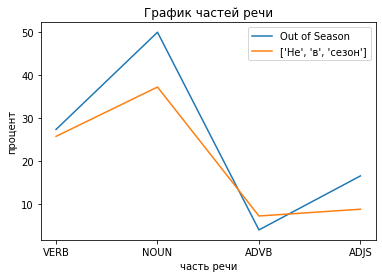

In [136]:
fig = plt.figure()
ax = plt.axes()
for i in [9]:
    plt.plot(percents_en[i:i+1].T, label=table_en["name"][i])
    plt.plot(percents_ru[i:i+1].T, label=table_ru["name"][i])


    ax.set(xlabel='часть речи', ylabel='процент',
       title='График частей речи');
plt.legend()

### Другие характеристики

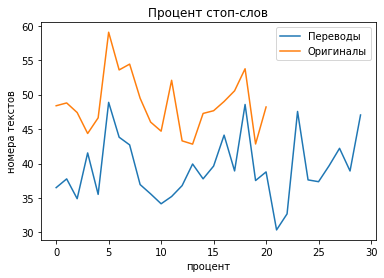

In [145]:
ax = plt.axes()
ax.plot(table_ru['percentage_of_stop_words'], label='Переводы')
ax.plot(table_en['percentage_of_stop_words'], label='Оригиналы')
ax.set(xlabel='процент', ylabel='номера текстов',title='Процент стоп-слов')
ax.legend()

[Text(0, 0.5, 'процент'),
 Text(0.5, 0, 'часть речи'),
 Text(0.5, 1.0, 'Процент частей речи, ориг')]

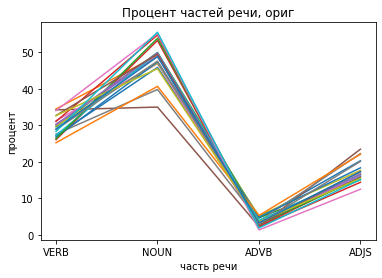

In [165]:
ax = plt.axes()
plt.plot(percents_en.T, label=table_en["name"])
#plt.plot(percents_ru.T, label=table_ru["name"])
ax.set(xlabel='часть речи', ylabel='процент',title='Процент частей речи, ориг')
#ax.legend()

[Text(0, 0.5, 'процент'),
 Text(0.5, 0, 'часть речи'),
 Text(0.5, 1.0, 'Процент частей речи, переводы')]

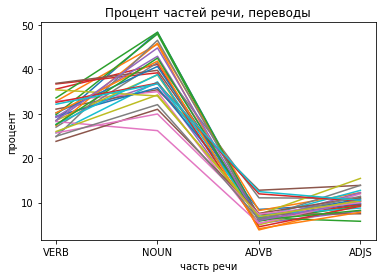

In [163]:
ax = plt.axes()
plt.plot(percents_ru.T, label=table_ru["name"])
#plt.plot(percents_ru.T, label=table_ru["name"])
ax.set(xlabel='часть речи', ylabel='процент',title='Процент частей речи, переводы')

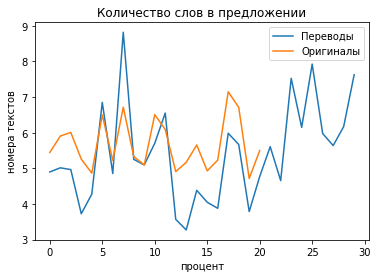

In [146]:
ax = plt.axes()
ax.plot(table_ru['num_of_words_in_sent'], label='Переводы')
ax.plot(table_en['num_of_words_in_sent'], label='Оригиналы')
ax.set(xlabel='процент', ylabel='номера текстов',title='Количество слов в предложении')
ax.legend()

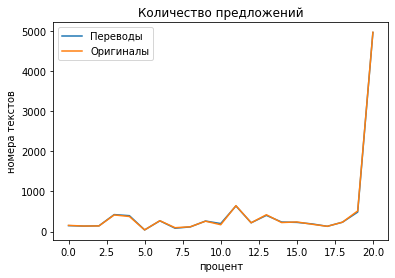

In [147]:
ax = plt.axes()
ax.plot(table_ru['num_of_sent'][:21], label='Переводы')
ax.plot(table_en['num_of_sent'][:21], label='Оригиналы')
ax.set(xlabel='процент', ylabel='номера текстов',title='Количество предложений')
ax.legend()